<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


/tmp/ipython-input-1127006376.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)


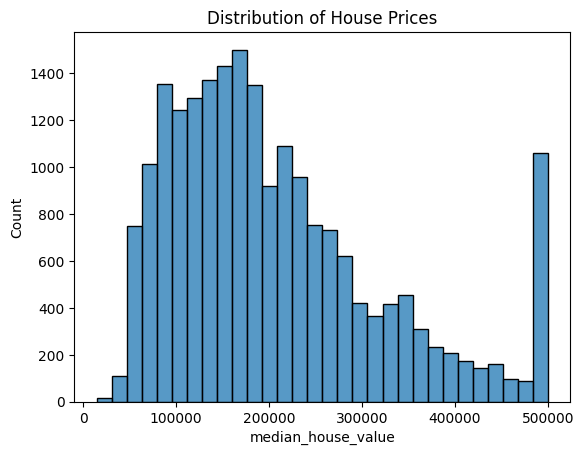

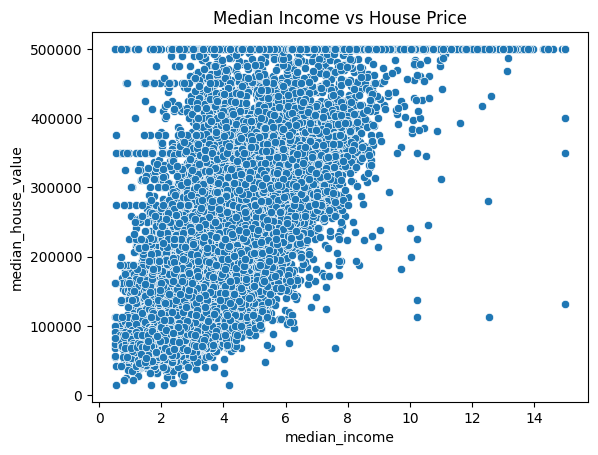

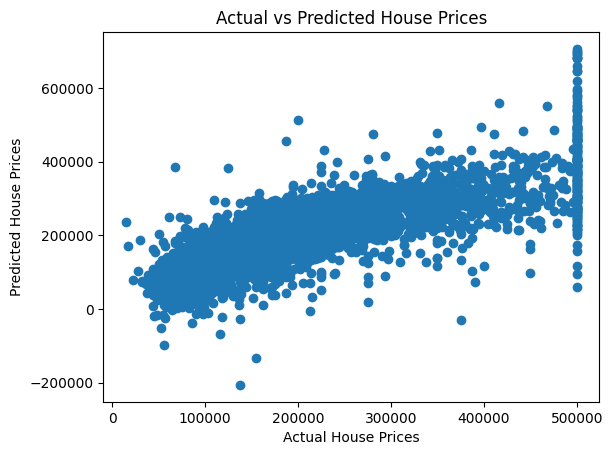

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)

df.head()

df.shape
df.info()
df.isnull().sum()
df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)
sns.histplot(df["median_house_value"], bins=30)
plt.title("Distribution of House Prices")
plt.show()
sns.scatterplot(
    x="median_income",
    y="median_house_value",
    data=df
)
plt.title("Median Income vs House Price")
plt.show()
y = df["median_house_value"]
X = df.drop(["median_house_value", "ocean_proximity"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mae

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()



## Observations
- Median income shows a strong relationship with house prices.
- The Linear Regression model was able to predict prices reasonably well.
- MAE and RMSE indicate acceptable prediction error for a baseline model.


## Conclusion
In this task, a Linear Regression model was used to predict house prices based on
housing features. The model was evaluated using MAE and RMSE and provides a
useful baseline for real estate price prediction.